In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# 1. Load Dataset
# Pastikan file CSV berada di folder yang sama dengan script ini
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# --- [1] RINGKASAN DATASET ---
print("--- Ringkasan Dataset ---")
print(f"Jumlah Baris: {df.shape[0]}, Jumlah Kolom: {df.shape[1]}")
print("\nInformasi Kolom:")
print(df.info())

# --- [4] PEMBERSIHAN DATA ---
# Mengubah TotalCharges menjadi numerik (karena ada spasi kosong yang terbaca sebagai string)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Mengisi 11 nilai NaN di TotalCharges dengan median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Menghapus kolom yang tidak diperlukan untuk analisis
df.drop('customerID', axis=1, inplace=True)

# --- [3] ANALISIS DATA EKSPLORATIF (EDA) ---
sns.set(style="whitegrid")

--- Ringkasan Dataset ---
Jumlah Baris: 7043, Jumlah Kolom: 21

Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract

/tmp/ipython-input-1766897630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


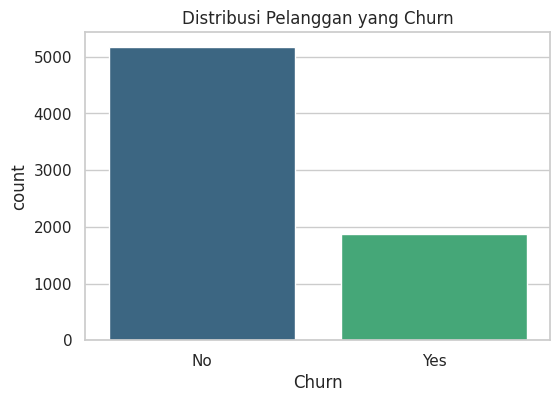

In [4]:
# Visualisasi 1: Distribusi Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Pelanggan yang Churn')
plt.show()

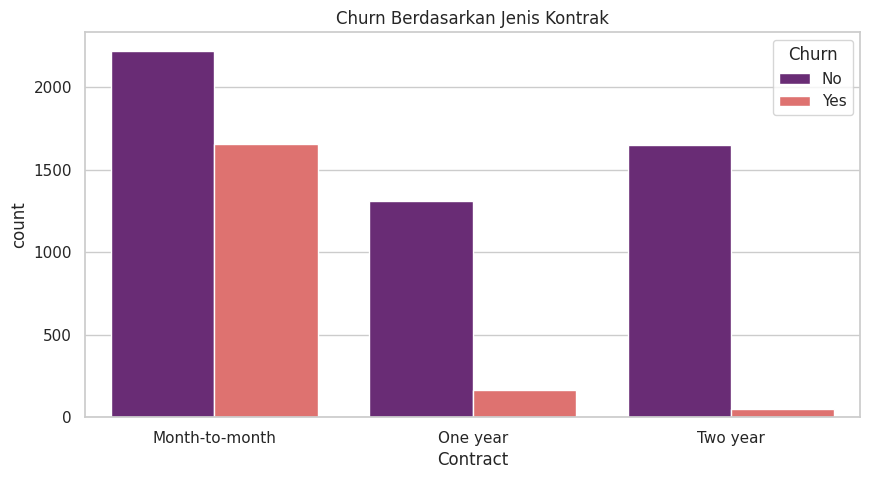

In [5]:
# Visualisasi 2: Hubungan Kontrak dengan Churn
plt.figure(figsize=(10, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='magma')
plt.title('Churn Berdasarkan Jenis Kontrak')
plt.show()

/tmp/ipython-input-3878750071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


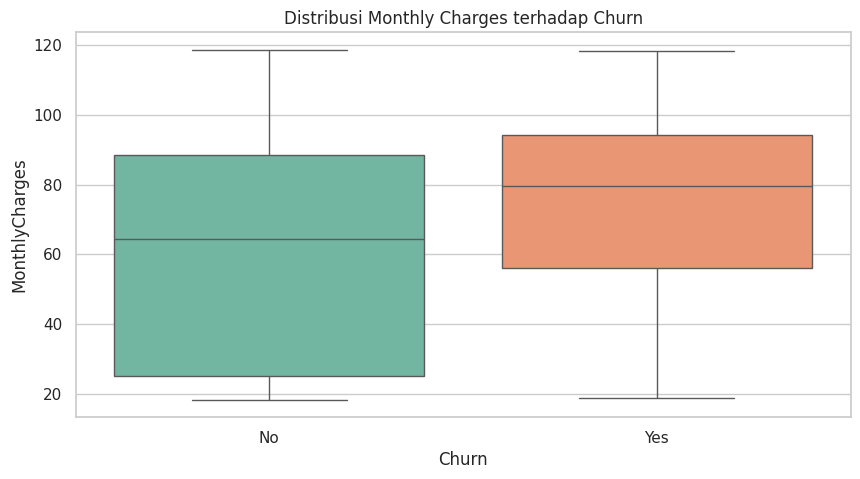

In [6]:
# Visualisasi 3: Hubungan Biaya Bulanan dengan Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Distribusi Monthly Charges terhadap Churn')
plt.show()

In [7]:
# --- [7] PENGUJIAN HIPOTESIS (Uji Chi-Square) ---
# Hipotesis: Apakah ada hubungan antara 'Contract' dan 'Churn'?
print("\n--- Pengujian Hipotesis (Chi-Square Test) ---")
contingency_table = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")

if p < 0.05:
    print("Hasil: Tolak H0 (Ada hubungan signifikan antara jenis kontrak dan churn).")
else:
    print("Hasil: Gagal Tolak H0 (Tidak ada hubungan signifikan).")

# --- [5] TEMUAN KUNCI ---
print("\n--- Temuan Kunci ---")
churn_rate = (df['Churn'].value_counts(normalize=True)['Yes'] * 100)
print(f"1. Tingkat Churn keseluruhan adalah {churn_rate:.2f}%.")
print("2. Pelanggan dengan kontrak 'Month-to-month' memiliki kecenderungan churn paling tinggi.")
print("3. Median MonthlyCharges bagi pelanggan yang churn lebih tinggi dibandingkan yang bertahan.")


--- Pengujian Hipotesis (Chi-Square Test) ---
Chi-Square Statistic: 1184.5966
P-Value: 0.0000
Hasil: Tolak H0 (Ada hubungan signifikan antara jenis kontrak dan churn).

--- Temuan Kunci ---
1. Tingkat Churn keseluruhan adalah 26.54%.
2. Pelanggan dengan kontrak 'Month-to-month' memiliki kecenderungan churn paling tinggi.
3. Median MonthlyCharges bagi pelanggan yang churn lebih tinggi dibandingkan yang bertahan.
